In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

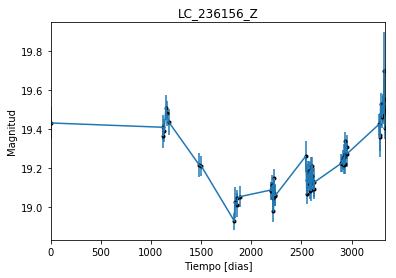

In [2]:
data = np.genfromtxt('LC_236156_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_236156_Z')
plt.savefig("LC_236156_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

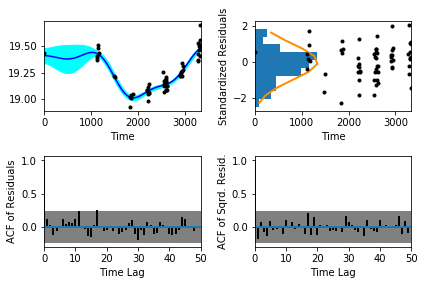

In [5]:
sample.assess_fit()

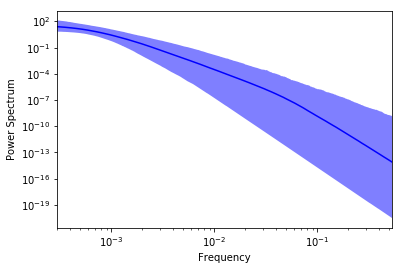

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

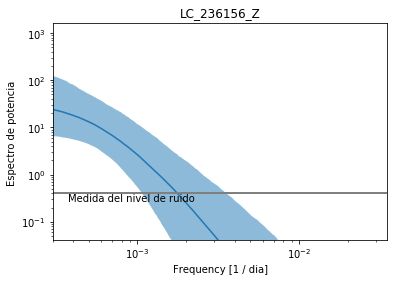

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_236156_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_236156_Z')

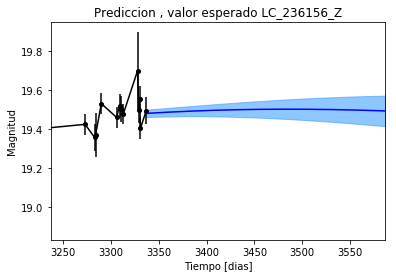

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_236156_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_236156_Z')

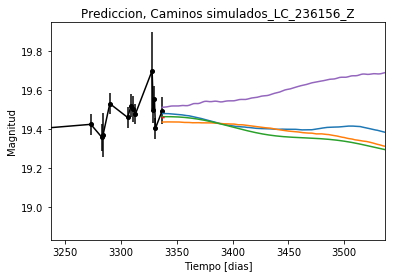

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_236156_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


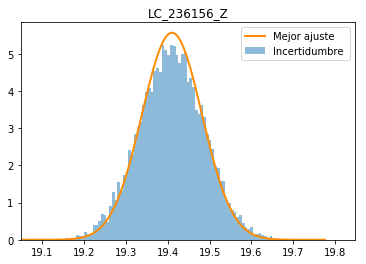

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_236156_Z')
plt.savefig("Mejor_ajuste_LC_236156_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_236156_Z')

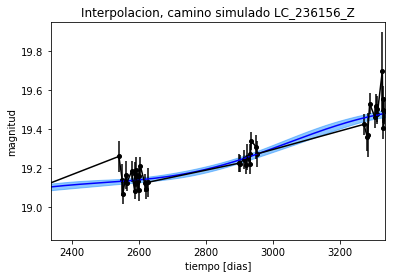

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_236156_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_236156_Z')

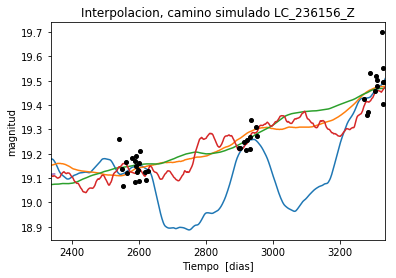

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_236156_Z')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 367.927284089
Median: 0.00564665150535
Standard deviation: 0.178196453398
68% credibility interval: [ 0.00050965  0.13402955]
95% credibility interval: [  3.11424537e-04   7.16370864e-01]
99% credibility interval: [  3.01599748e-04   1.01968524e+00]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 556.712178506
Median: 0.000681477689084
Standard deviation: 0.06323571632
68% credibility interval: [ 0.00036042  0.00607726]
95% credibility interval: [ 0.0003069   0.16352831]
99% credibility interval: [  3.00493012e-04   4.62522125e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 884.042729162
Median: 0.0105590793759
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1562.95646807
Median: 120.142104175
Standard deviation: 1.6052452699
68% credibility interval: [ 118.32374458  121.27926803]
95% credibility interval: [ 115.74371929  121.94817122]
99% credibility interval: [ 113.88826491  122.23150118]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 570.07964245
Median: 0.445297486776
Standard deviation: 1.91482238389
68% credibility interval: [ 0.03172472  3.11912901]
95% credibility interval: [ 0.01044127  6.58903266]
99% credibility interval: [ 0.00841791  8.41490426]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 821.491485033
Median: 0.101819894707
Standard deviation: 7.29722270055
68% credibility interval: [ 0.00387029  3.17233354]
95% credibility interval: [  1.87169901e-04

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 18236.0497374
Median: 1.79231252272e-29
Standard deviation: 1.13247916247e+43
68% credibility interval: [  9.00956762e-62   9.04406226e-09]
95% credibility interval: [  5.95107207e-96   1.85148496e+01]
99% credibility interval: [  3.49438115e-119   2.40618274e+021]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1689.74868032
Median: 19.2998306019
Standard deviation: 0.122042182062
68% credibility interval: [ 19.20005059  19.4150281 ]
95% credibility interval: [ 19.07789139  19.56009215]
99% credibility interval: [ 18.95059553  19.71270121]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 567.35852807
Median: 0.000208414374964
Standard deviation: 0.209145073816
68% credibility interval: [ 0.          0.16476274]
95% credibility interval: [ 0.          0.83203893]
99% credibility interval: [ 0.          1.01350315]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 567.35852807
Median: 0.000208414374964
Standard deviation: 0.209145073816
68% credibility interval: [ 0.          0.16476274]
95% credibility interval: [ 0.          0.83203893]
99% credibility interval: [ 0.          1.01350315]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 534.027766818
Median: 0.0
Standard deviation: 0.000235754762706
68% 

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1562.95646807
Median: 120.142104175
Standard deviation: 1.6052452699
68% credibility interval: [ 118.32374458  121.27926803]
95% credibility interval: [ 115.74371929  121.94817122]
99% credibility interval: [ 113.88826491  122.23150118]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1503.33226691
Median: 0.0381754079155
Standard deviation: 0.0576608524703
68% credibility interval: [ 0.02096075  0.07614531]
95% credibility interval: [ 0.01334562  0.17306888]
99% credibility interval: [ 0.00976141  0.33498049]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1821.2739389
Median: 0.874351094626
Standard deviation: 0.12713781297
68% credibility interval: [ 0.7571968   1.00577084]
95% credibility interval: [ 0.67054878  1.1733604 ]
99% credibility interval: [ 0.62017045  1.28592823]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 2439.29854429
Median: 9.41149607808e-06
Standard deviation: 0.00741218454693
68% credibility interval: [  2.19015465e-07   4.07502415e-04]
95% credibility interval: [  1.30797780e-09   3.61029951e-03]
99% credibility interval: [  7.30455010e-27   1.08213318e-02]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 367.927284089
Median: (-0.0354789577732+0j)
Standard deviation: 1.72639749783
68% credibility interval: [-0.84213249+0.j        -0.00320224-0.0019044j]
95% credibility interval: [ -4.50109089e+00+0.j         -1.95673807e-03-0.0016377j]
99% credibility interval: [ -6.40687133e+00+0.j          -1.89500711e-03-0.00100323j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 556.712178506
Median: (-0.00428185060322+0j)
Standard deviation: 1.37284964485
68% credibility interval: [-0.03818456+0.j -0.00226457+0.j]
95% credibility interval: [-1.02747866+1.14596978j -0.00192829+0.j        ]
99% credibility interval: [ -2.90611222e+00+4.51378628j  -1.88805328e-03+0.00707551j]
Posterior summary for parameter ar_roots  element 2
-----